# Tutorial de instalacion SQL SERVER en linux (Ubuntu v22.04)
#### Autor : Jefferson Coaquira Cruz
[LINKEDIN](https://www.linkedin.com/in/jefferson-coaquira-cruz-a49030228/)

## Configuraremos nuestra instacia ec2(aws)

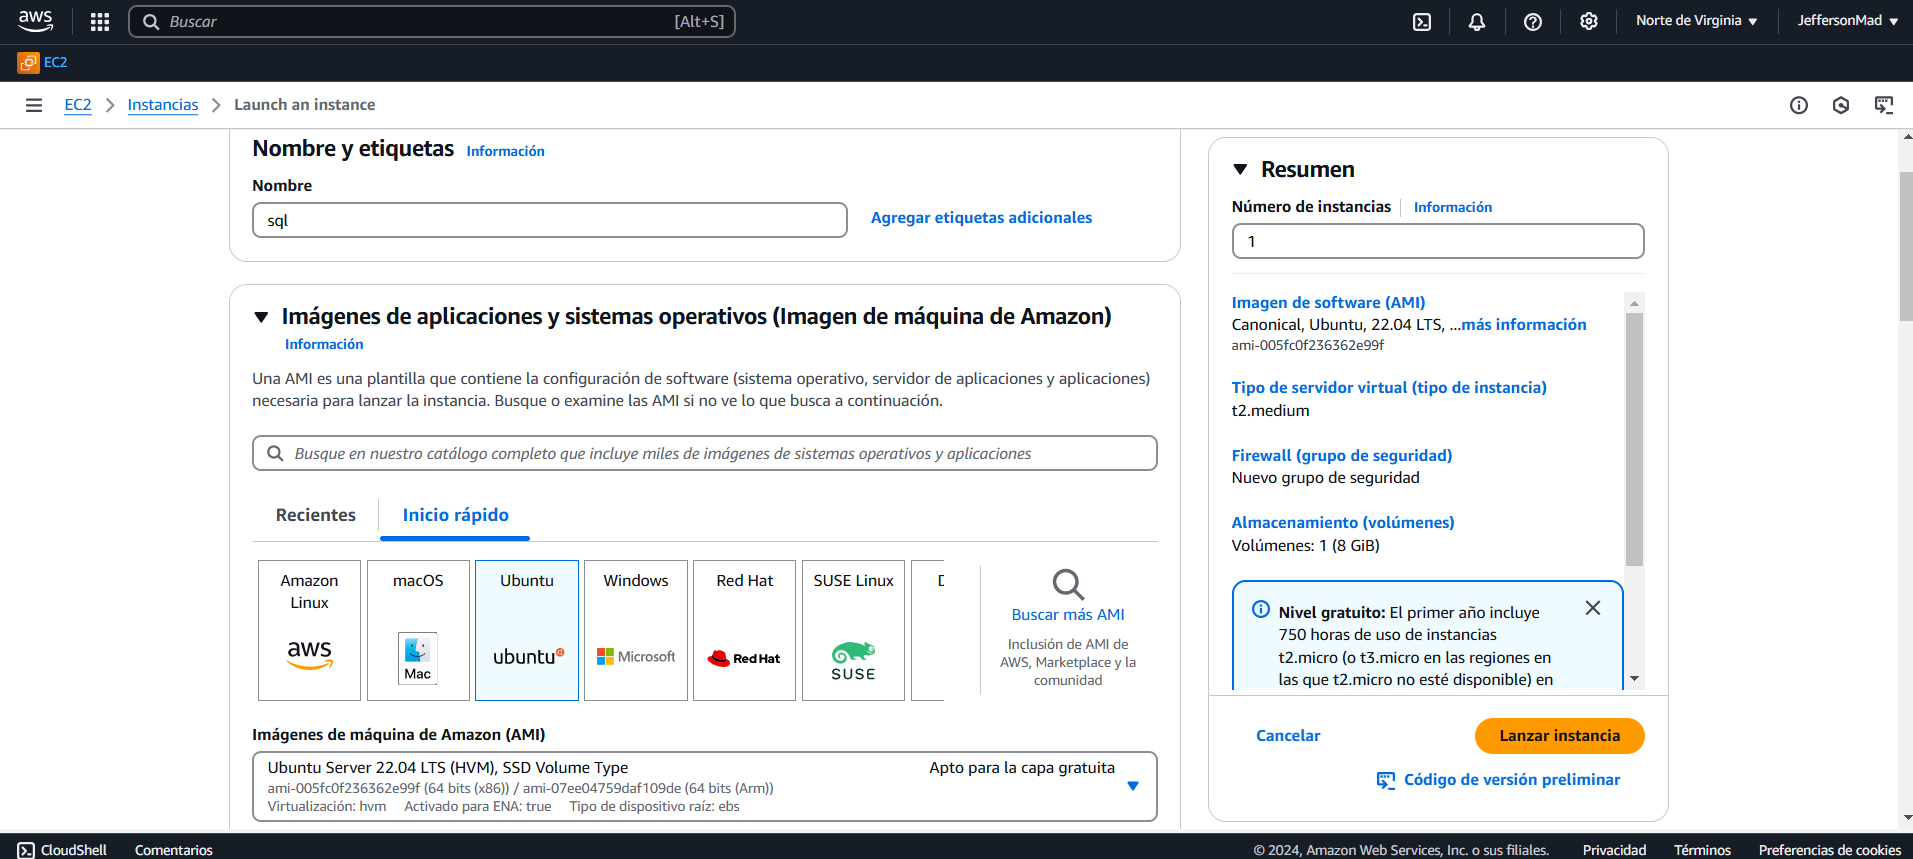

Receurda que el tipo de instacia debe tener mas de 2gb de ram para sql server 

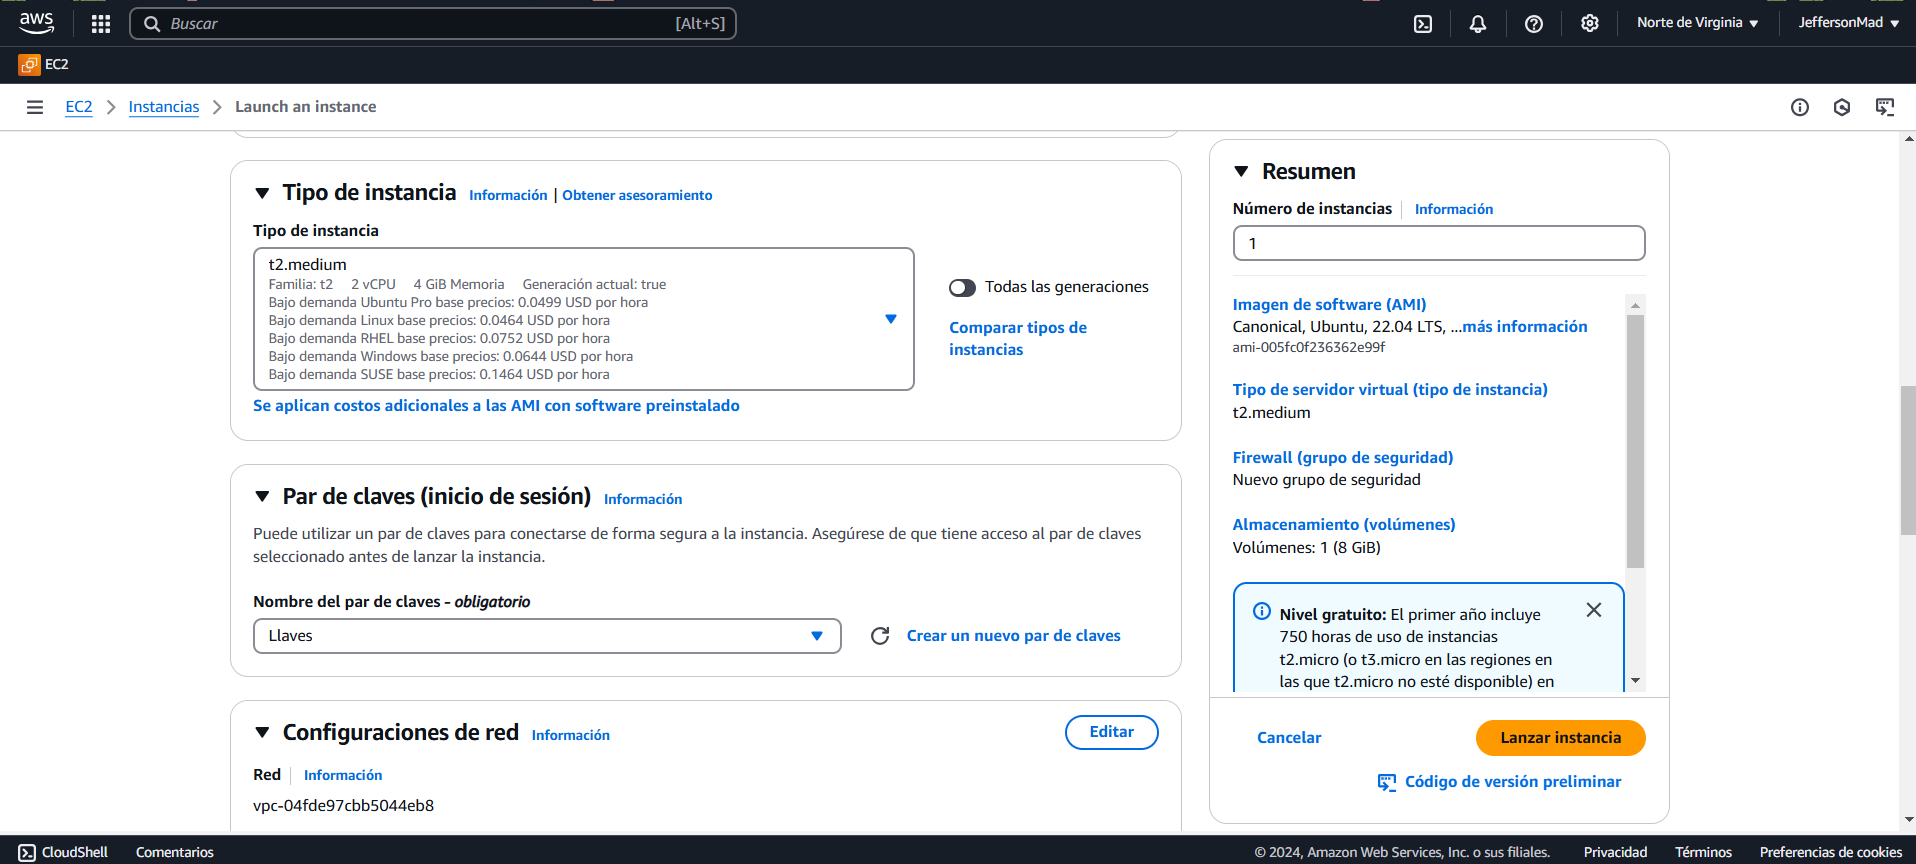

Crearemos un par de llaves el cual se puede usar para una conexion remota a nuestra instancia (recuerda donde la guaras para la futura conexion)

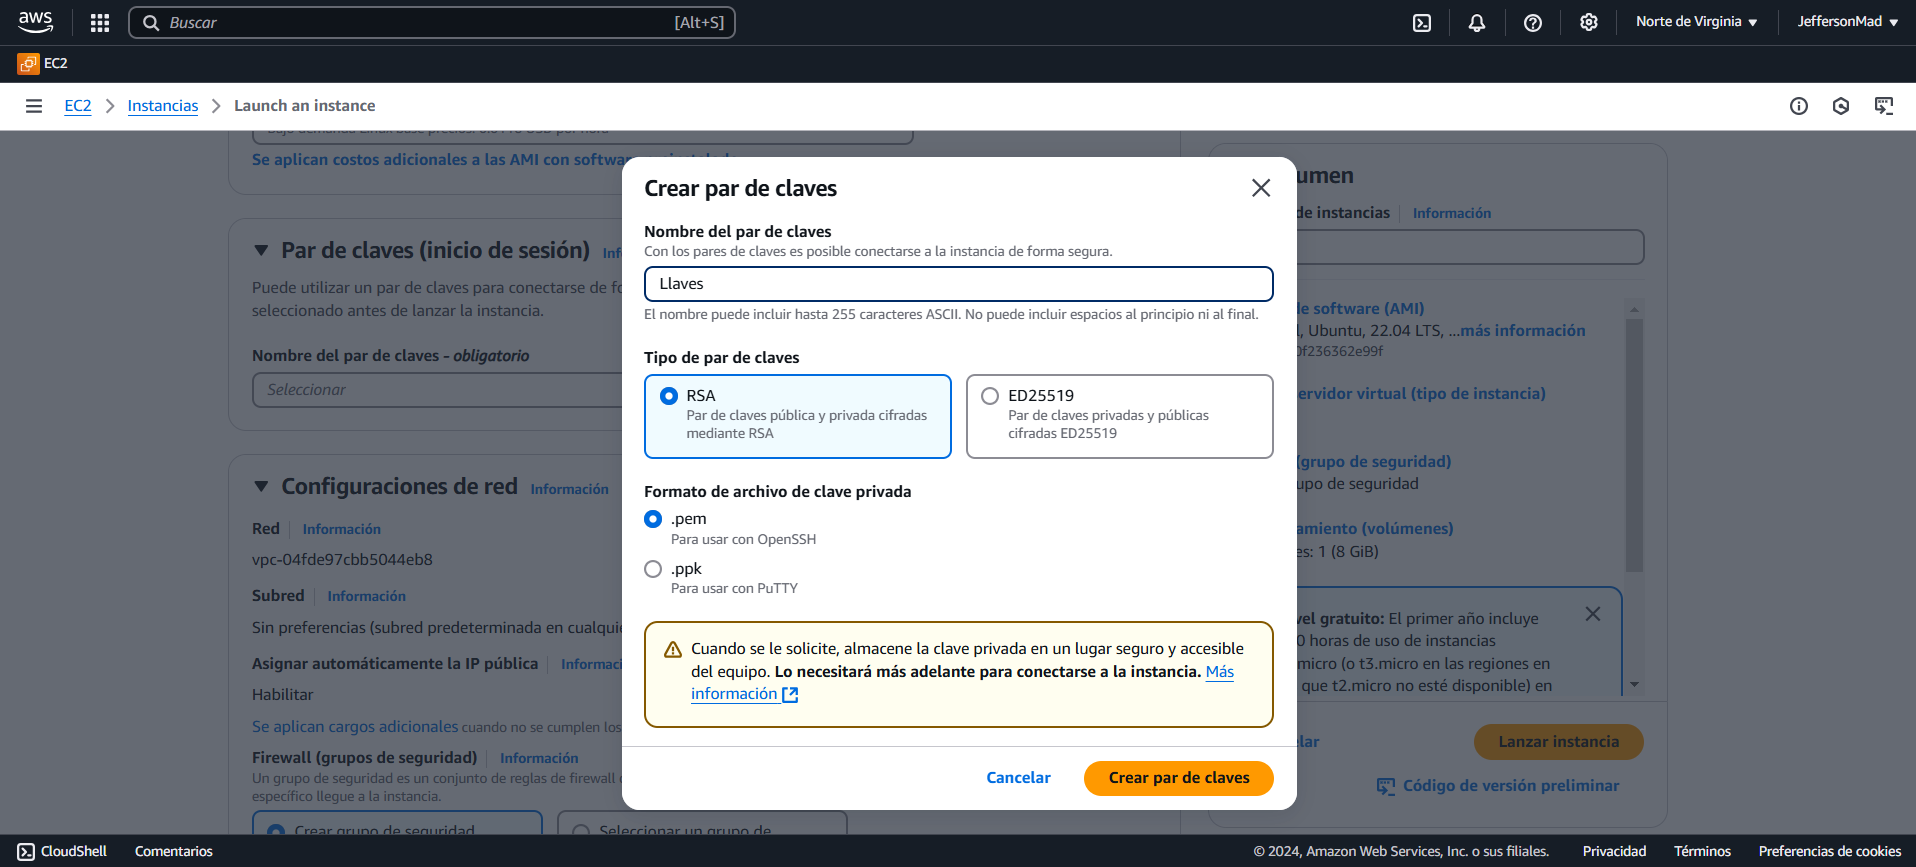

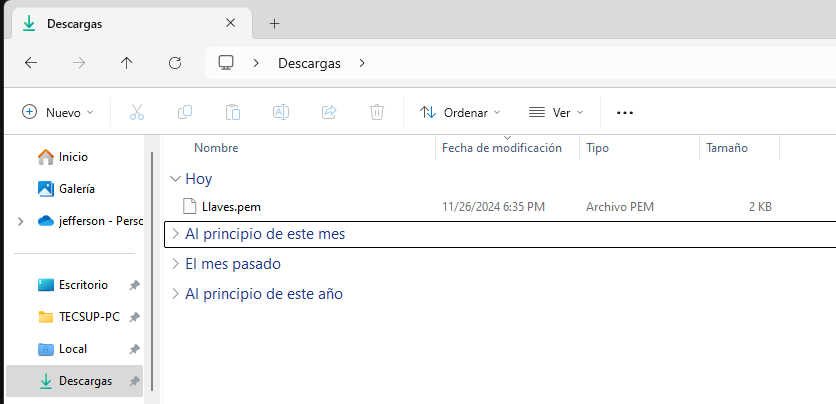

Lanzamos nuestra instancia de ec2

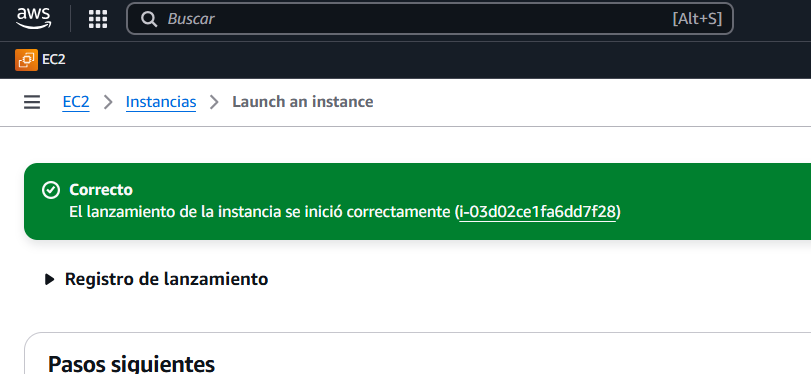
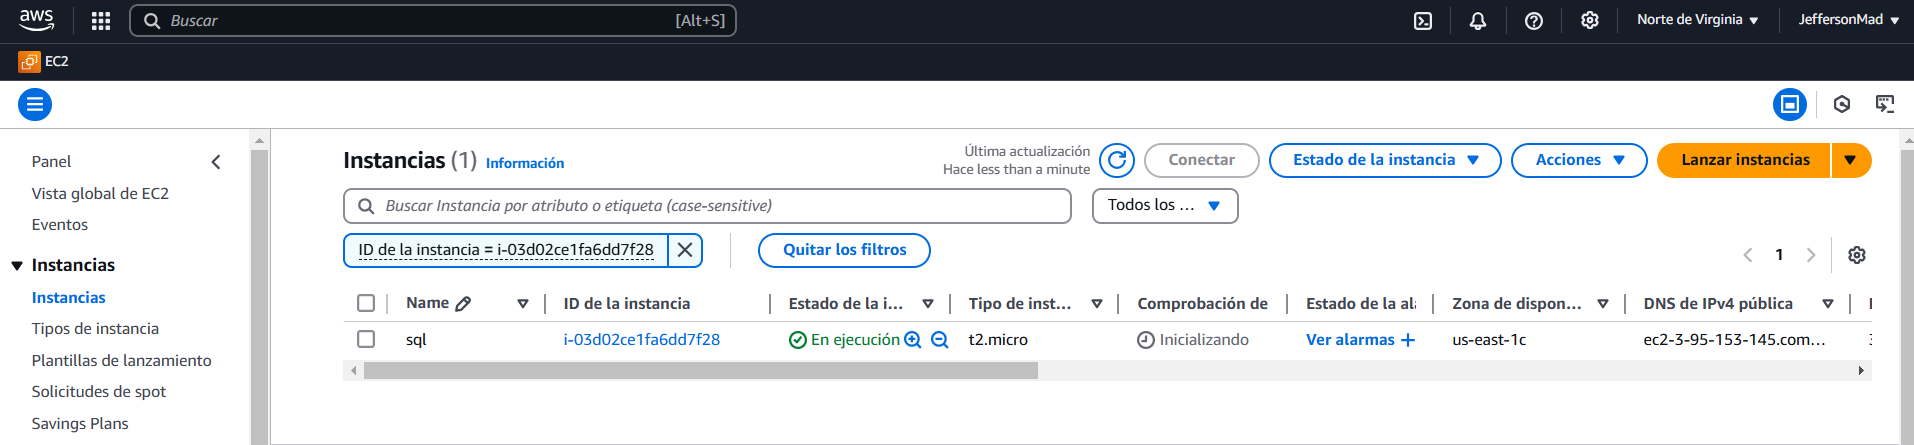

Ahora nos conectactemos mediantes SSH para usar nuestra propia terminal(abrir la terminal donde esta nuestra Llaves.pem):

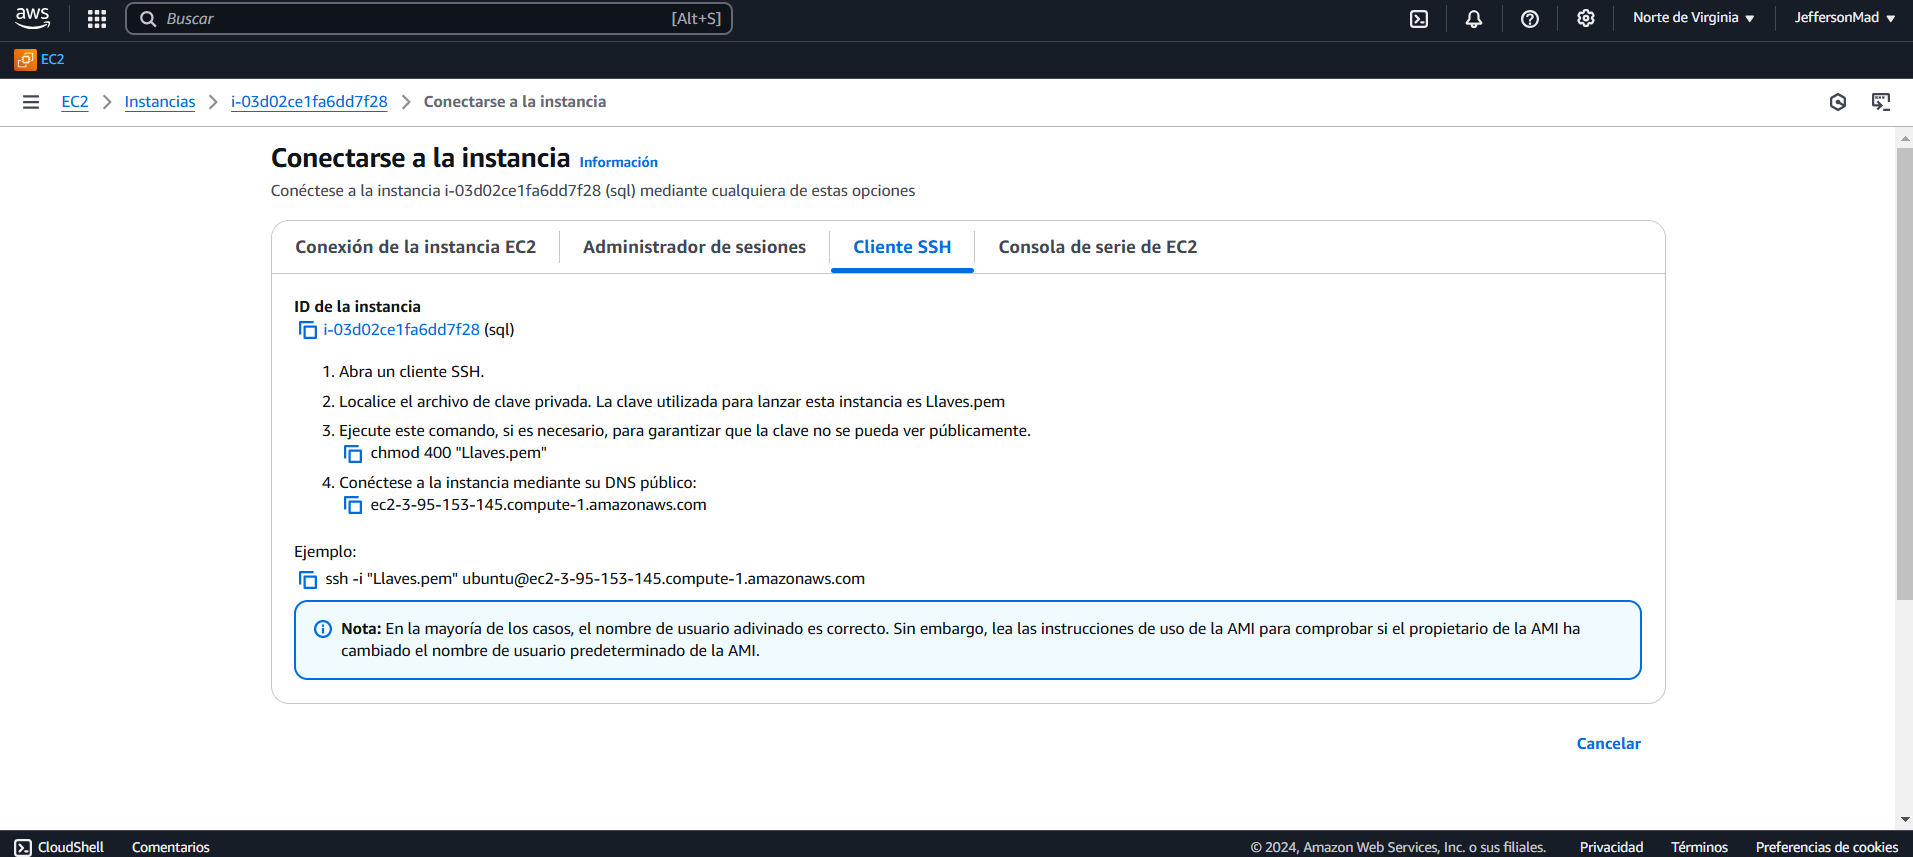
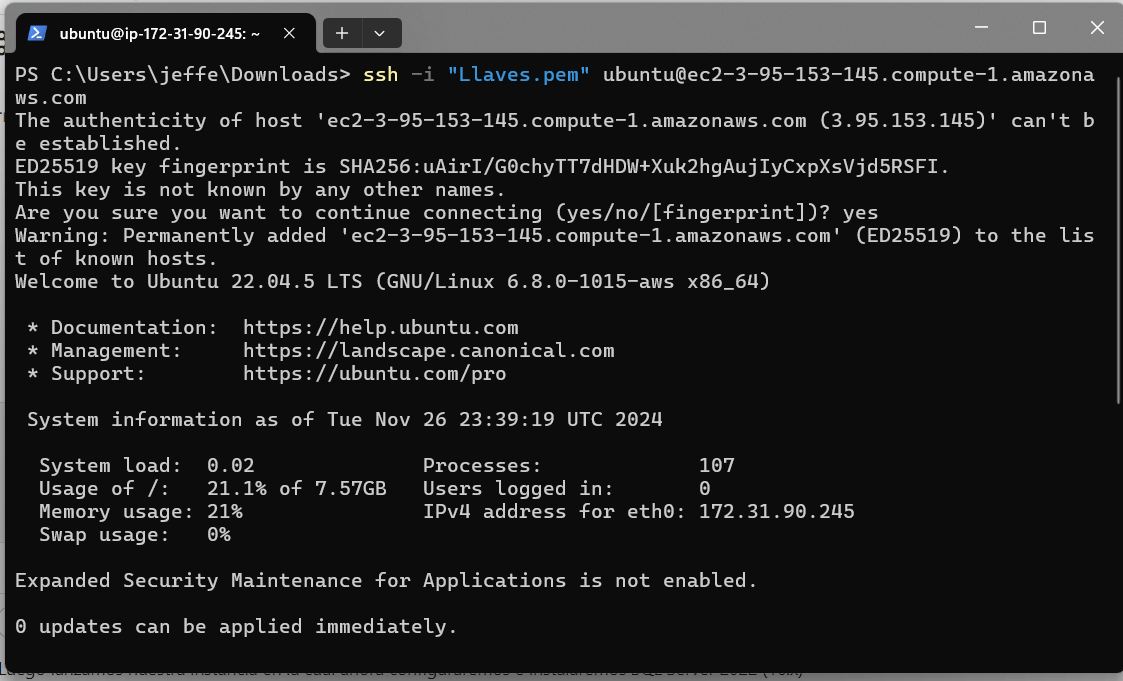

## Instalar SQL Server

Luego lanzamos nuestra instancia en la cual ahora configuraremos e instalaremos SQL Server 2022 (16.x)

Importar las claves GPG del repositorio público.
```
curl https://packages.microsoft.com/keys/microsoft.asc | sudo tee /etc/apt/trusted.gpg.d/microsoft.asc
```

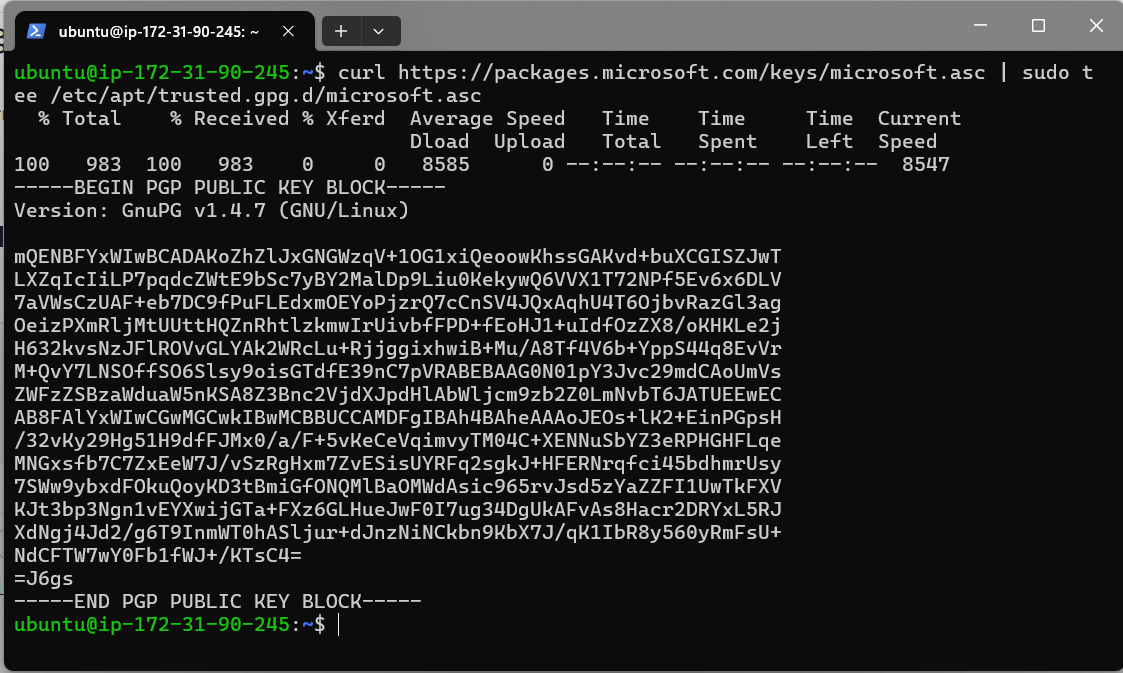

Descargue y registre manualmente el repositorio de SQL Server Ubuntu:
```
curl -fsSL https://packages.microsoft.com/config/ubuntu/22.04/mssql-server-2022.list | sudo tee /etc/apt/sources.list.d/mssql-server-2022.list
```

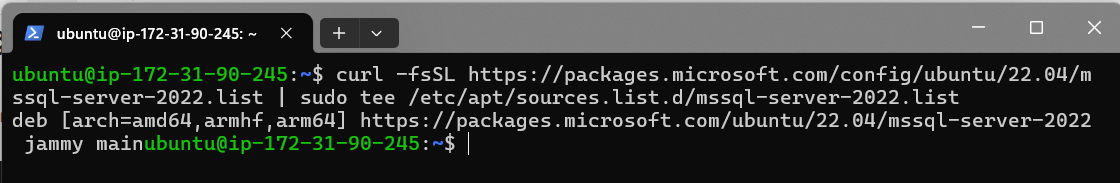

Descargue y registre manualmente el repositorio de SQL Server Ubuntu:
```
sudo apt-get update
```

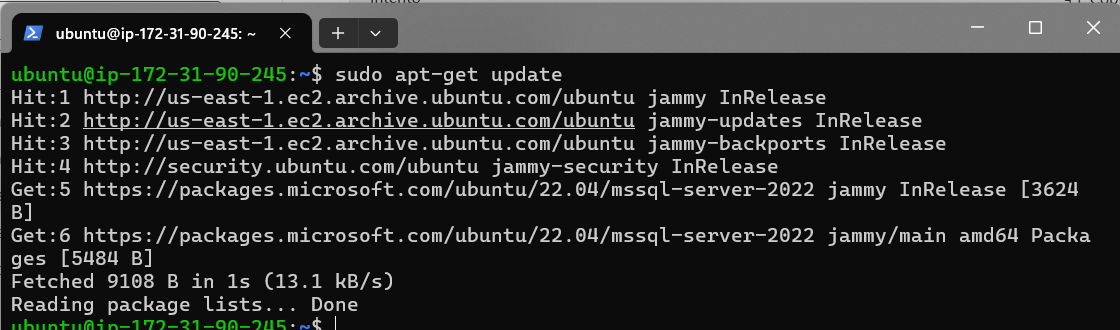

Luego:

```
sudo apt-get install -y mssql-server
```

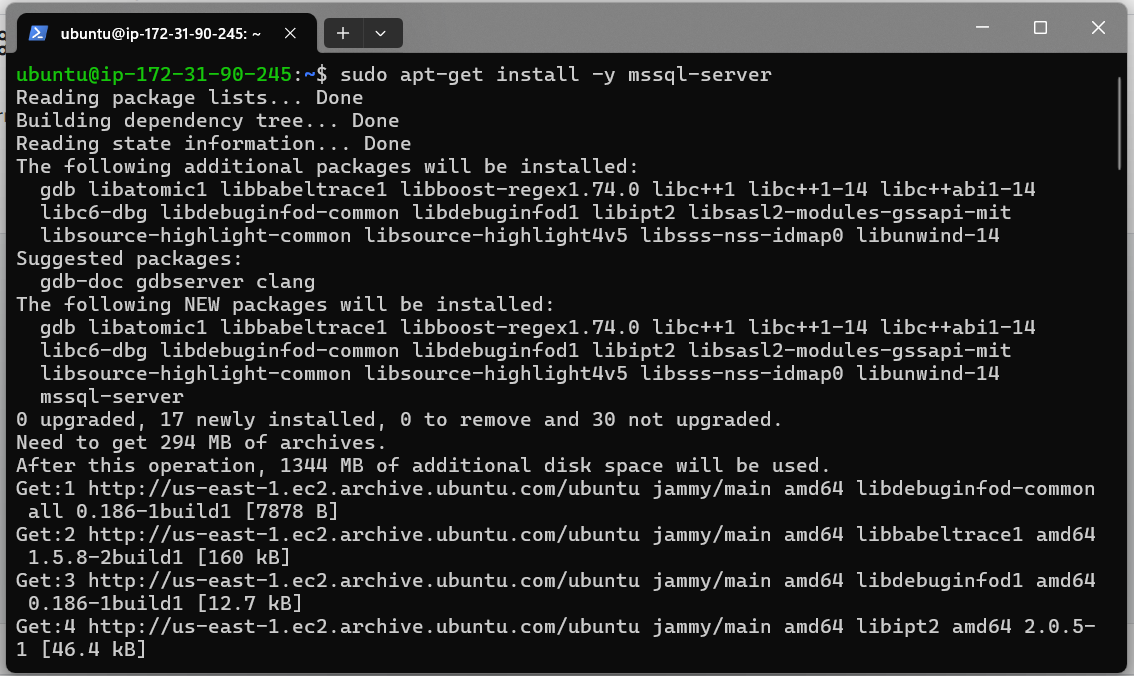
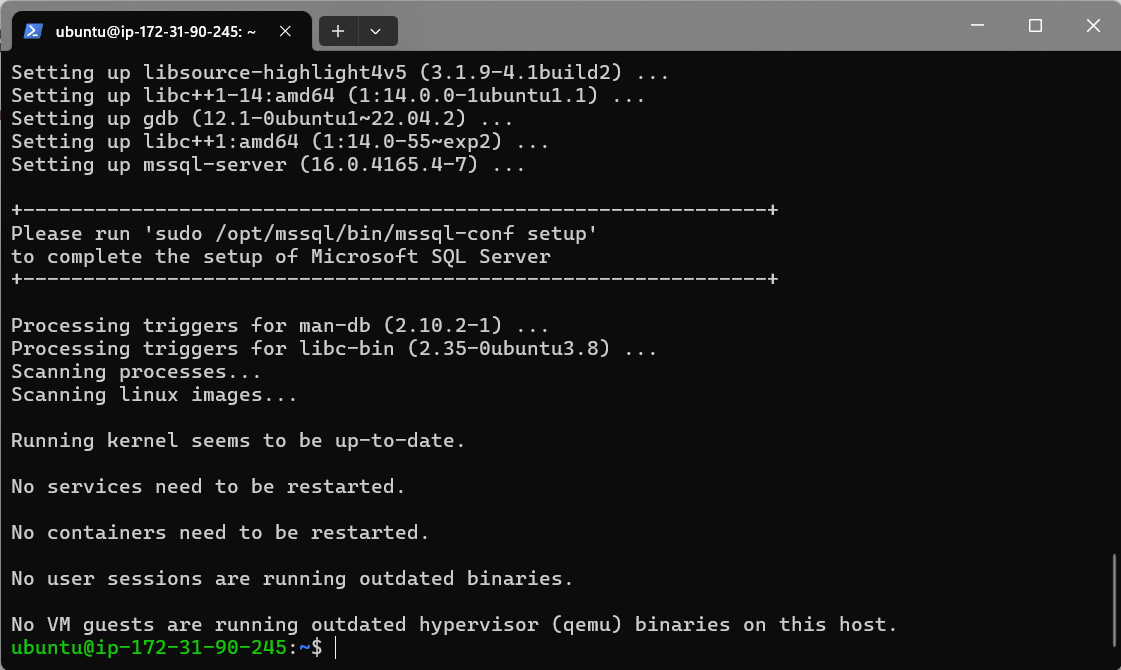`

Una vez finalizada la instalación del paquete, ejecute el programa mssql-conf setupy siga las instrucciones para establecer la sacontraseña y elegir su edición. Le recordamos que las siguientes ediciones de SQL Server tienen licencias gratuitas: Evaluation, Developer y Express.
```
sudo /opt/mssql/bin/mssql-conf setup
```
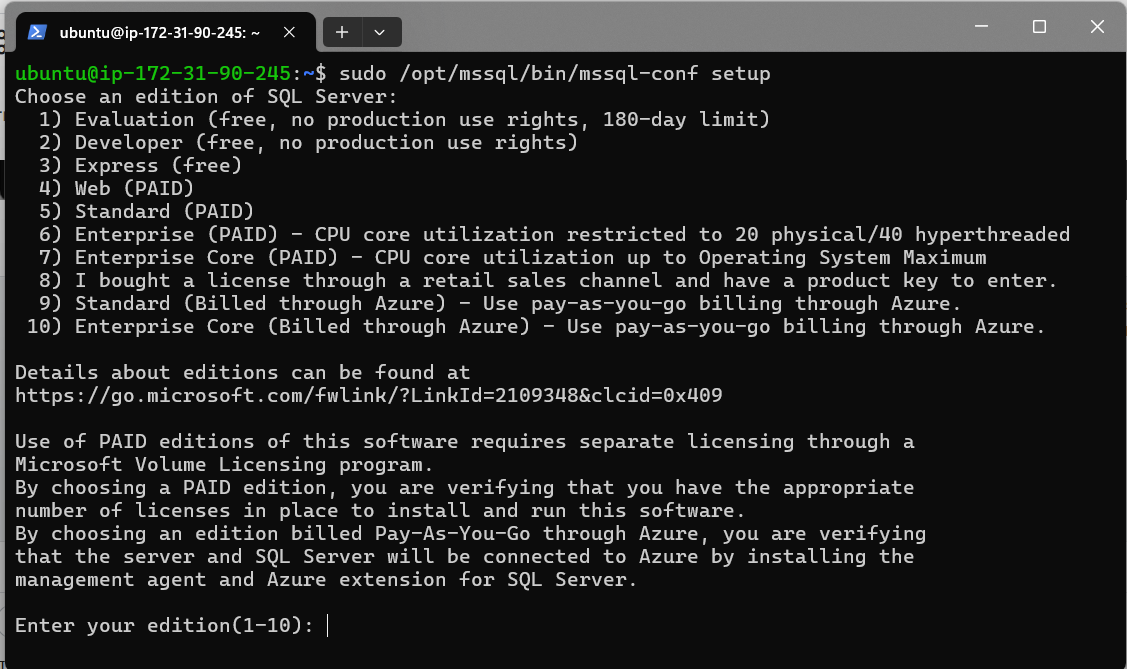

En nuestro caso, elegiremos la edición Developer(2) ya que estamos trabajando en un entorno de prueba y desarrollo. Esta edición es gratuita y nos permite acceder a todas las funcionalidades de SQL Server Enterprise, lo cual es perfecto para experimentar y probar sin restricciones, aunque no se puede usar en producción.

``` Contrasena : Tutorial123! ```

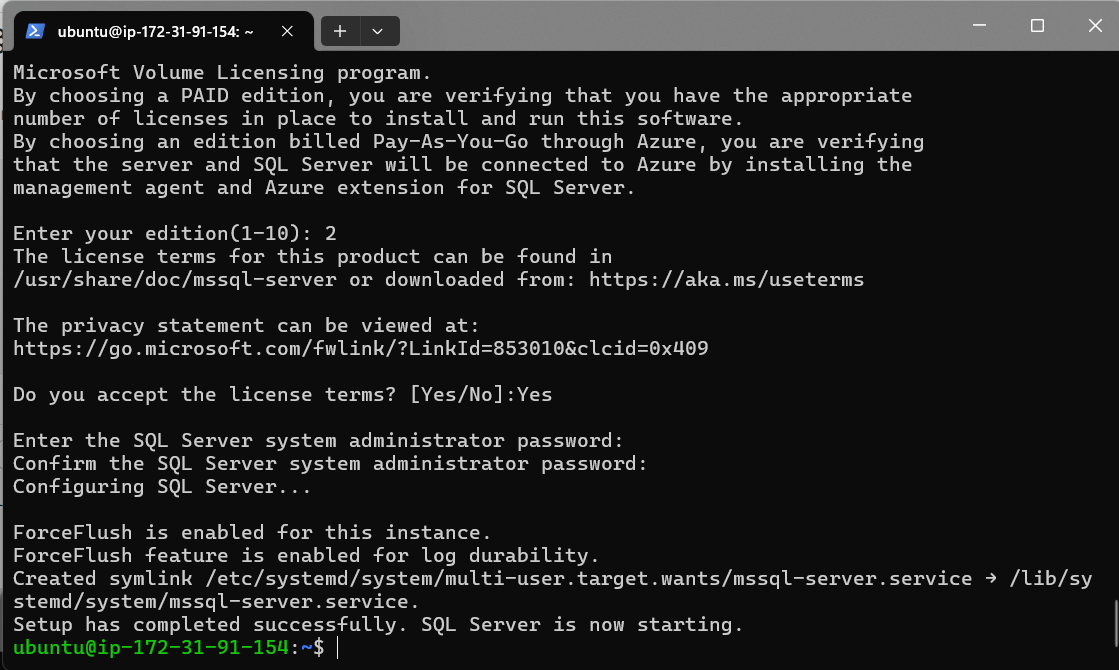

Una vez realizada la configuración, verifique que el servicio esté ejecutándose:
```
systemctl status mssql-server --no-pager
```
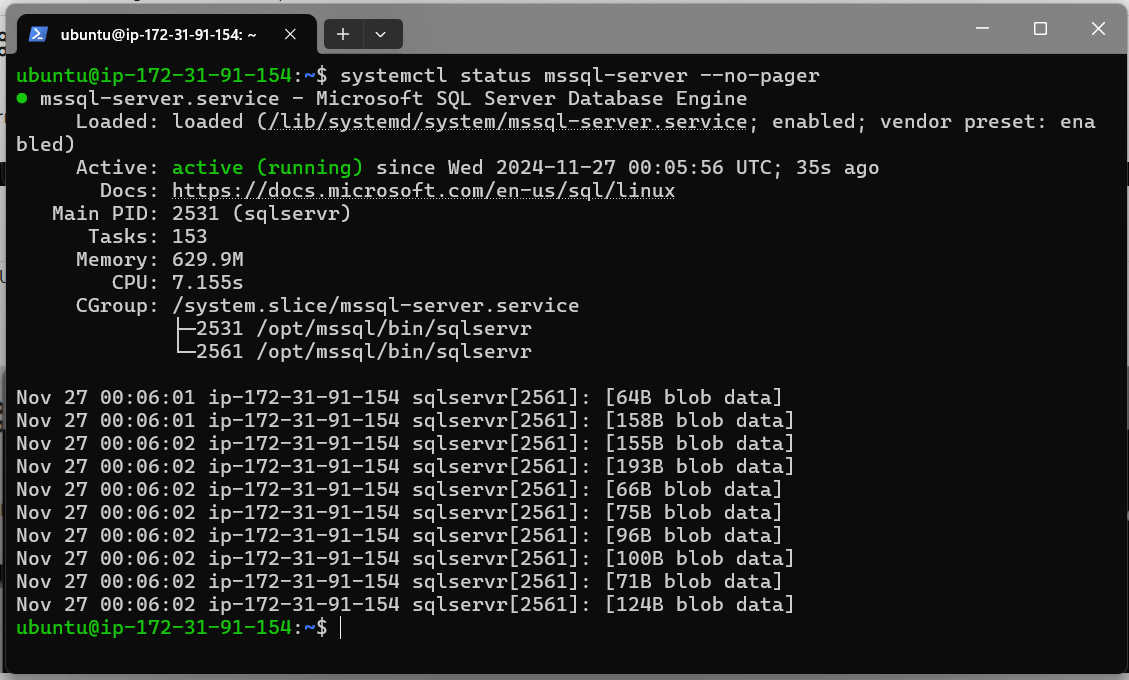

El estado muestra que el servicio de SQL Server está instalado y se encuentra activo.

## Instalar las herramientas de línea de comandos de SQL Server

Para crear una base de datos, debe conectarse con una herramienta que pueda ejecutar instrucciones Transact-SQL en SQL Server. Los siguientes pasos instalan las herramientas de línea de comandos de SQL Server: utilidad sqlcmd y utilidad bcp .


Utilice los siguientes pasos para instalar mssql-tools18 en Ubuntu.

Importar las claves GPG del repositorio público.
```
curl https://packages.microsoft.com/keys/microsoft.asc | sudo tee /etc/apt/trusted.gpg.d/microsoft.asc
```

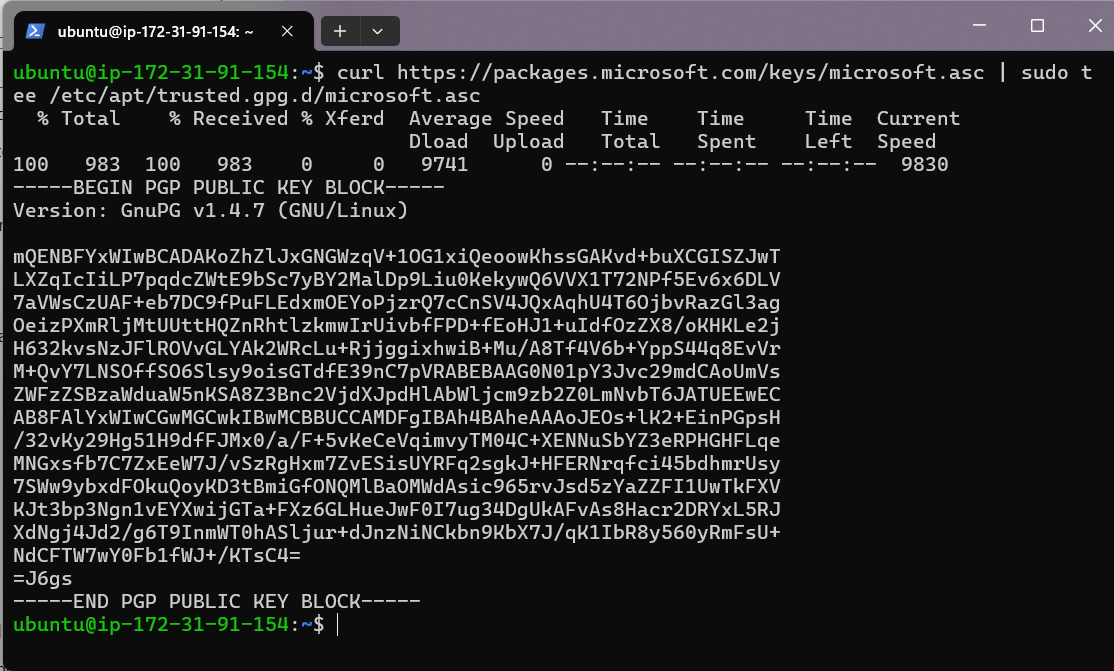

Registrar el repositorio de Microsoft Ubuntu.
Para Ubuntu 22.04, utilice el siguiente comando:

```
curl https://packages.microsoft.com/config/ubuntu/22.04/prod.list | sudo tee /etc/apt/sources.list.d/mssql-release.list
```

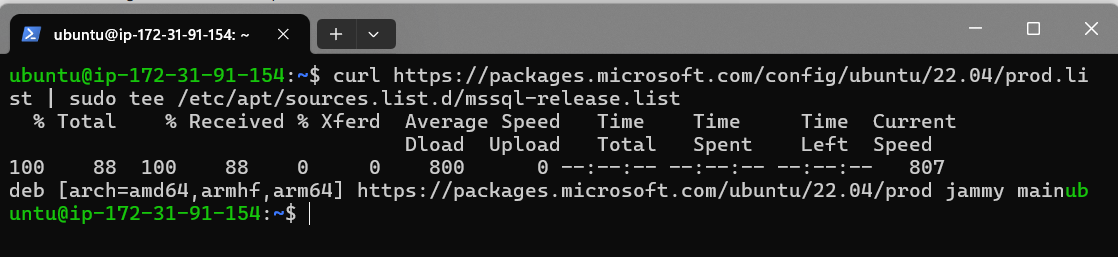

Actualice la lista de fuentes y ejecute el comando de instalación con el paquete de desarrollador unixODBC.

```
sudo apt-get update
```

Luego(si aparece como una ventana emeergente precioanmos en YES):

```
sudo apt-get update
```

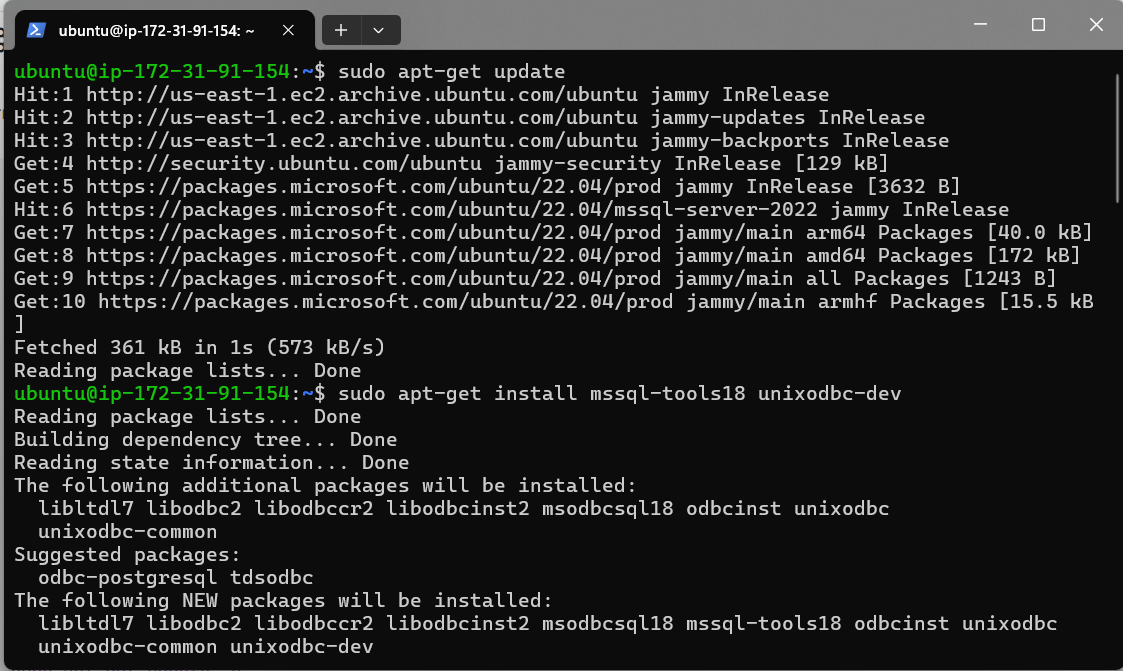

Para actualizar a la última versión de mssql-tools , ejecute los siguientes comandos:
```
sudo apt-get update
```
Luego:
```
sudo apt-get install mssql-tools18
```
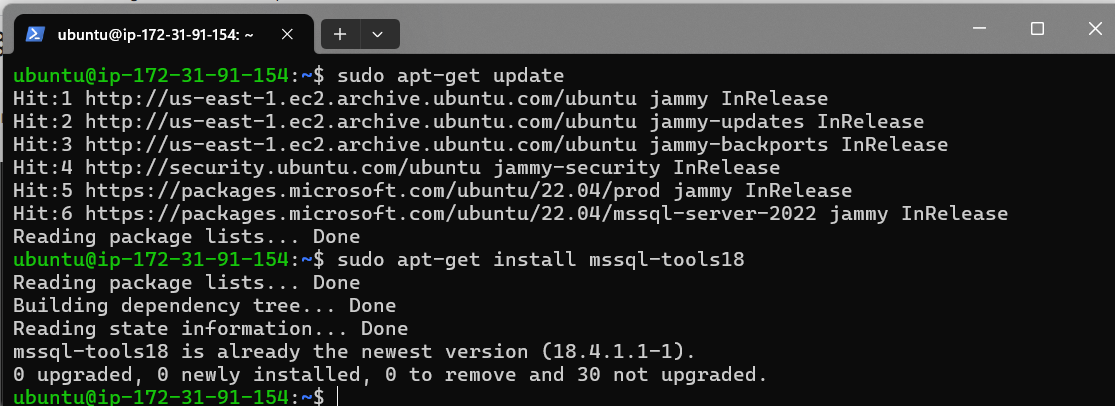

**Recomendable : agregue /opt/mssql-tools18/bin/a su PATHvariable de entorno en un shell bash.**
Para que sqlcmd y bcp sean accesibles desde el shell bash para sesiones interactivas/sin inicio de sesión, modifique el PATHarchivo ~/.bashrccon el siguiente comando:

```
echo 'export PATH="$PATH:/opt/mssql-tools18/bin"' >> ~/.bashrc

```
Luego este 
```
source ~/.bashrc
```

En este tutorial, se conectarán al servidor SQL Server sin validar el certificado SSL utilizando el parámetro -TrustServerCertificate. Esto se debe a que, en entornos de prueba o desarrollo, SQL Server genera un certificado autofirmado que no es reconocido como válido por el cliente. Esta opción permite omitir la validación del certificado para simplificar la conexión y enfocarse en el uso del servidor, sin comprometer la seguridad en un entorno controlado.
Con el siguiente comando:
```
sqlcmd -S localhost -U SA -P 'Tutorial123!' -C

```

### Paso opcional si tienes el siguiente error
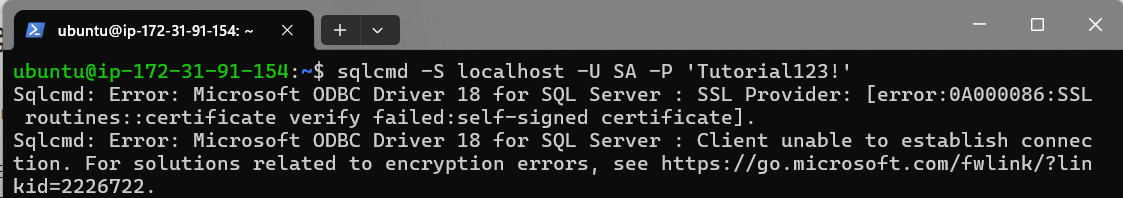

La imagen anterior muestra un error co nel certificado SSL comun en sql . Para resolver el problema con la validación del certificado SSL, agregaremos manualmente las configuraciones necesarias.

Editar el archivo de configuración


Abre el archivo con permisos de superusuario:
```
sudo nano /var/opt/mssql/mssql.conf

```

Agrega las siguientes líneas al final del archivo(Con las flechas bajamos y en la ultima linea de damos click derecho y para guardarlo (ctrl + s) y (ctrl + x):

```
[network]
encrypt = no
trustservercertificate = yes
```

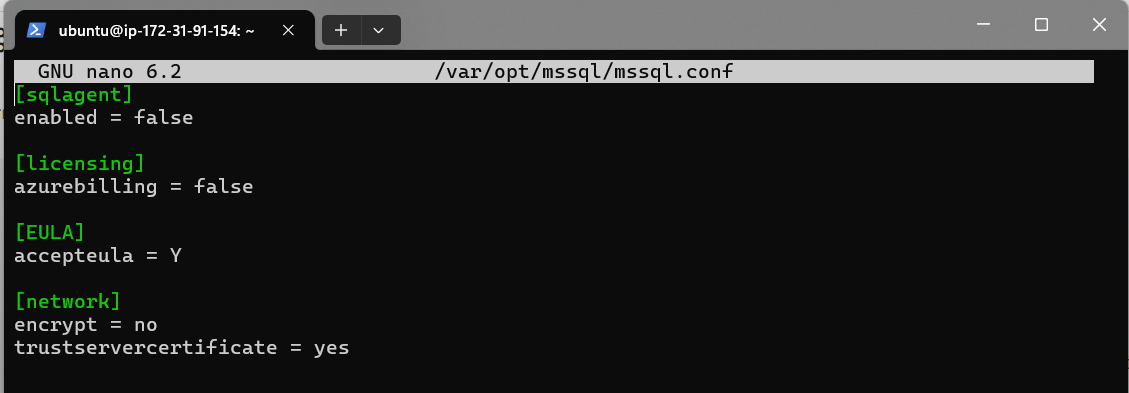

Reiniciar el servicio de SQL Server

```
sudo systemctl restart mssql-server
```

# Test de Validación de SQL Server

**1. Verifica las bases de datos existentes**
Ejecuta este comando para listar las bases de datos predeterminadas(Rcuerda que primero es la sentencia y luego siempre en sql es el GO):

```
SELECT name FROM sys.databases;

GO
```

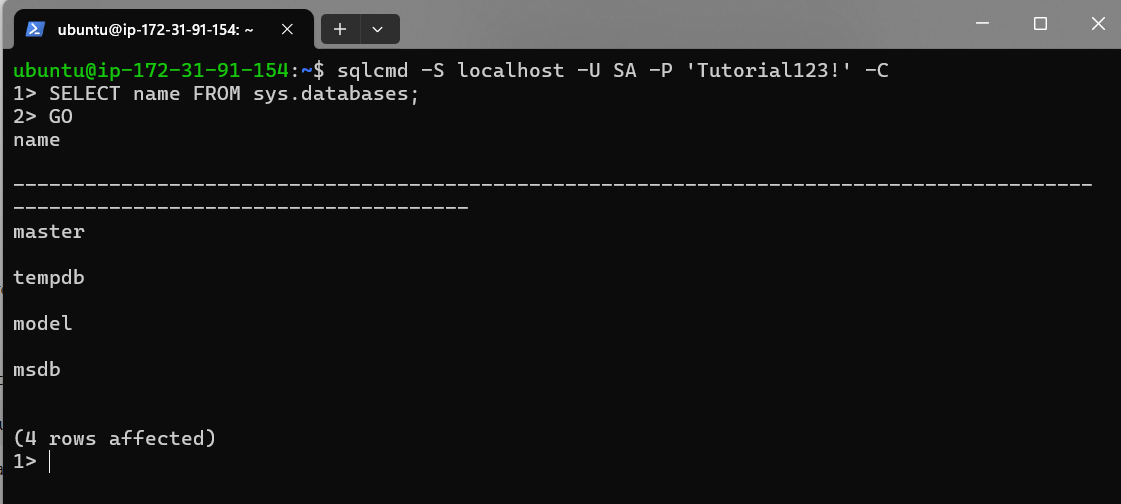

**2. Crea una nueva base de datos**
Prueba creando una base de datos llamada TestDB:

```
CREATE DATABASE TestDB;

GO
```

Verifica que se haya creado correctamente con ejemplo 1:

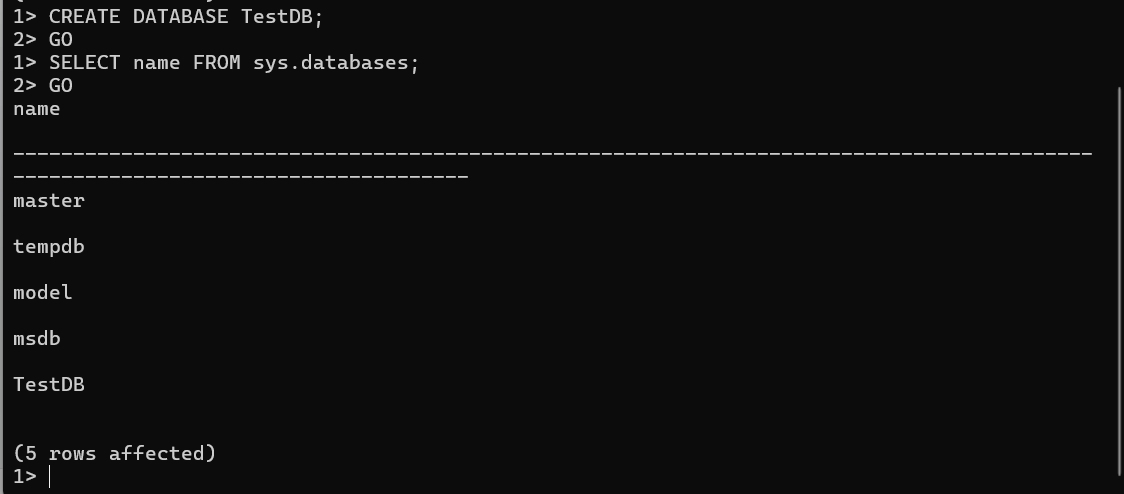

**3. Usa la base de datos creada**
Cambia el contexto a la nueva base de datos:

```
USE TestDB;

G

`

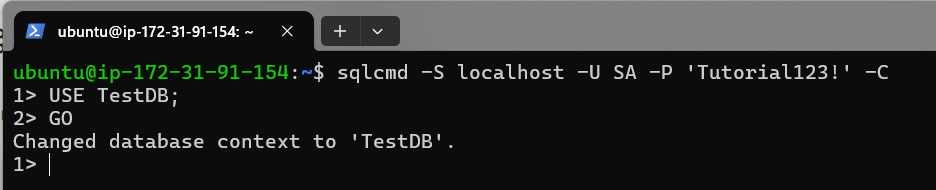

**4. Crea una tabla de prueba**
Crea una tabla llamada Personas:

```
CREATE TABLE Personas (
    ID INT PRIMARY KEY IDENTITY(1,1),
    Nombre NVARCHAR(50),
    Edad INT

)
GO

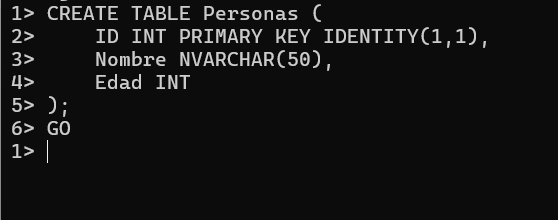

**5. Inserta datos en la tabla**
Agrega un par de filas de datos:

```
INSERT INTO Personas (Nombre, Edad) VALUES ('Juan', 30);
INSERT INTO Personas (Nombre, Edad) VALUES ('María', 25);

O



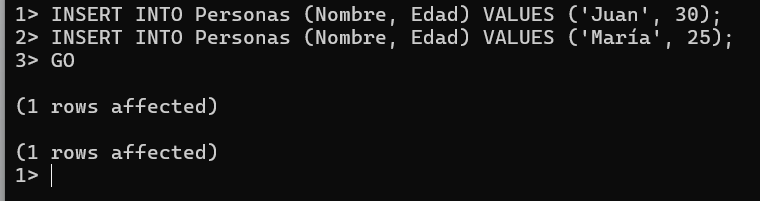

**6. Consulta los datos de la tabla**
Verifica que los datos se han insertado correctamente:

```
SELECT * FROM Personas;


GO
`
`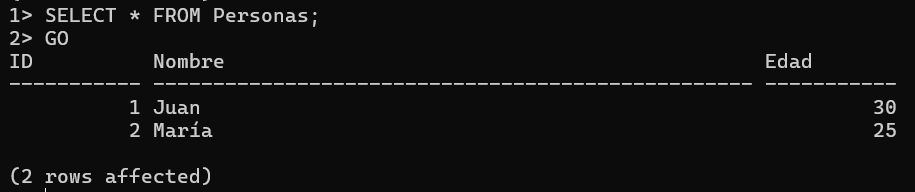`
```

`````